Activity 1.1
It's the last time we're going to use our good friend, the iris dataset - but deep learning has so many things that can go wrong, if we have a familiar dataset it can be very helpful! Build a fully connected deep learning model for predicting the species of a iris plant given its attributes. Perform proper scaling, train/test splitting, and find the best metric to use to measure performance (hint: this is a classification task so mean squared error won't work!).

In [1]:
# Import tensorflow and keras, you need condo for this
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, InputLayer
from tensorflow.keras.utils import to_categorical

# Commonly used modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn tools
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, f1_score

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
 5   labels        150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,labels
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [5]:
y = data['labels'].values
y = y.reshape(-1, 1)
x = data.values[0:,0:3]

x_scaler = MinMaxScaler()
x = x_scaler.fit_transform(x)

# It is very common to force it to have one sample per line in this way
x = x.reshape(-1, 1, 3)

y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y)
#print(x,y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train =x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train.shape)

(120, 1, 3)


In [7]:
model = keras.Sequential(
    [
        Dense(8, activation='relu', input_shape=(1, 3)),
        Dense(8, activation='relu'),
        Dense(1)
    ]
)

# Two callback functions to control the learning rate of the model. Will be clear
# later!
lr_reduct = tf.keras.callbacks.ReduceLROnPlateau(verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

# Actually compile the model with the optimizer function, loss function, any
# metrics we want to track etc.
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 8)              32        
_________________________________________________________________
dense_1 (Dense)              (None, 1, 8)              72        
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, epochs=15, batch_size=5, validation_data=(x_test, y_test), verbose=0)
#history = model.fit(x_train, 
                    #y_train, 
                    #epochs=10, 
                    #verbose=1, 
                    #batch_size=1, 
                    #validation_split=0.2,
                    #callbacks=[lr_reduct, early_stopping])

In [9]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,val_loss,val_mae
0,0.291281,0.433152,0.420848,0.584102
1,0.190027,0.324118,0.311435,0.497714
2,0.140238,0.290209,0.230693,0.423766
3,0.104620,0.254499,0.171137,0.357016
4,0.078218,0.214579,0.128123,0.299799
5,0.058499,0.179895,0.096546,0.252523
6,0.044569,0.157551,0.072488,0.217040
7,0.034664,0.139680,0.054617,0.191308
8,0.028549,0.131106,0.045820,0.176301
9,0.025501,0.128101,0.038282,0.163335


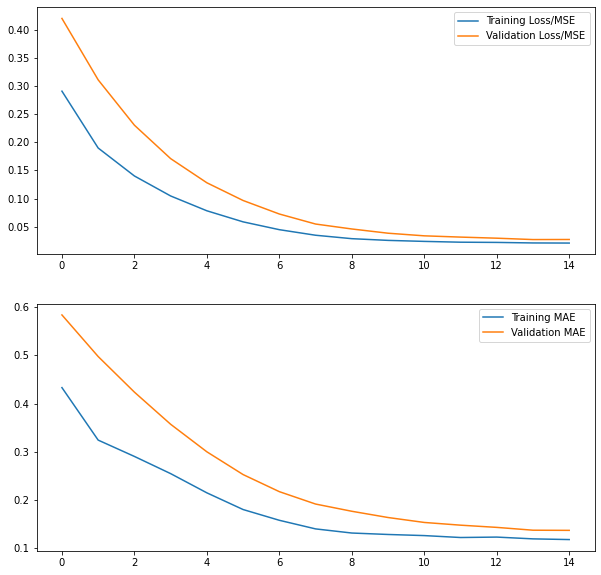

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(history_df['loss'], label="Training Loss/MSE")
ax1.plot(history_df['val_loss'], label='Validation Loss/MSE')
ax1.legend()

ax2.plot(history_df['mae'], label="Training MAE")
ax2.plot(history_df['val_mae'], label="Validation MAE")
ax2.legend()

plt.show()

In [11]:
y_predict = model.predict(x_test)

In [12]:
# Since our data was transformed, we have to transform it back to
# something that makes sense.
y_predict = y_scaler.inverse_transform(y_predict.reshape(-1, 1))
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Here we use mean absolute error to get an intepretable value.
print("RMSE for test dataset:", mean_absolute_error(y_predict, y_test))

RMSE for test dataset: 0.2733024974664052


In [ ]:
#Can't get RMSE to work